In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D    
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import StandardScaler
import seaborn as sns
from scipy import stats

# read in the Kessler Objects of Interest (KOI) dataset
# the first 53 lines are description
df = pd.read_csv('../data/koi.csv', skiprows=53)

In [22]:

# these are the columns we are interested in using
X = df[['koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr', 'koi_steff', 'koi_slogg', 'koi_srad', 'koi_kepmag']]

# we want to predict if the disposition is CONFIRMED
y = df['koi_disposition'] == 'CONFIRMED'

# replace missing values with the mean of the column
X = X.fillna(X.mean())

# remove outliers
mask = (np.abs(stats.zscore(X)) < 3).all(axis=1)

X = X[mask]
y = y[mask]

# scale
scaler = StandardScaler()
X = scaler.fit_transform(X)


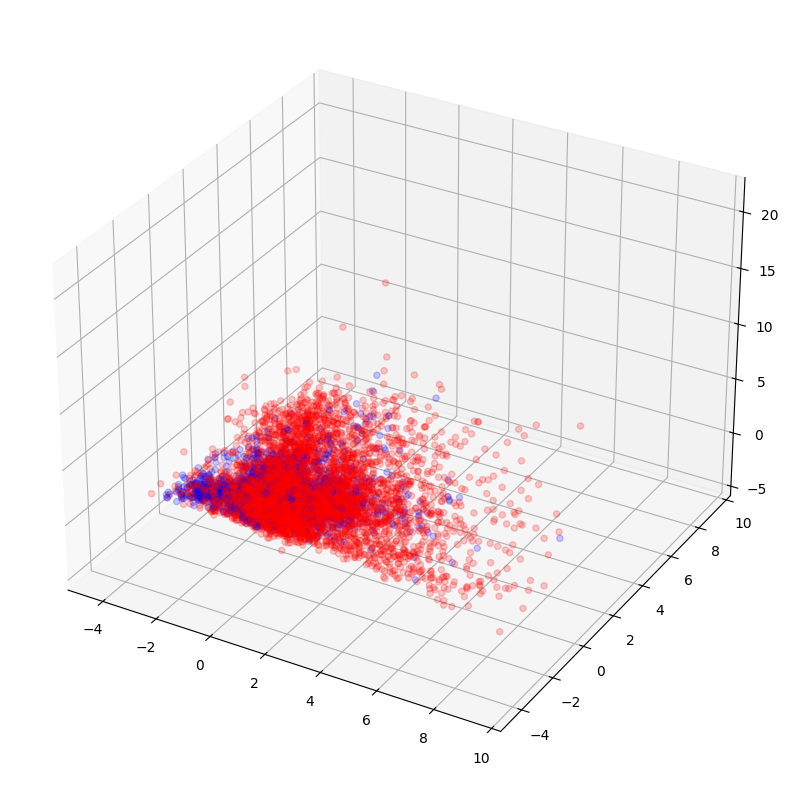

In [23]:
pca = PCA(n_components=3)
pca_X = pca.fit_transform(X)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.set_xlim(-5, 10)
ax.set_ylim(-5, 10)

colours = y.map({True: 'blue', False: 'red'})

ax.scatter(pca_X[:,0], pca_X[:,1], pca_X[:,2], c=colours, alpha=0.2)
plt.show()